data reading from file...


Start date,2017-01-04
End date,2018-12-31
Total months,23
,Backtest
Annual return,18.206%
Cumulative returns,39.449%
Annual volatility,21.768%
Sharpe ratio,0.88
Calmar ratio,0.72
Stability,0.86
Max drawdown,-25.319%


Start date,2017-01-04
End date,2018-12-31
Total months,23
,Backtest
Annual return,18.206%
Cumulative returns,39.449%
Annual volatility,21.768%
Sharpe ratio,0.88
Calmar ratio,0.72
Stability,0.86
Max drawdown,-25.319%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,25.32,2018-07-25,2018-12-24,NaT,NaN
1,10.93,2018-03-12,2018-04-02,2018-06-01,60
2,6.93,2017-07-20,2017-07-31,2017-10-12,61
3,6.71,2018-02-01,2018-02-05,2018-02-12,8
4,5.48,2017-02-08,2017-04-19,2017-05-01,59


Stress Events,mean,min,max
New Normal,0.08%,-6.26%,6.44%


Start date,2017-01-04
End date,2018-12-31
Total months,23
,Backtest
Annual return,18.206%
Cumulative returns,39.449%
Annual volatility,21.768%
Sharpe ratio,0.88
Calmar ratio,0.72
Stability,0.86
Max drawdown,-25.319%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,25.32,2018-07-25,2018-12-24,NaT,NaN
1,10.93,2018-03-12,2018-04-02,2018-06-01,60
2,6.93,2017-07-20,2017-07-31,2017-10-12,61
3,6.71,2018-02-01,2018-02-05,2018-02-12,8
4,5.48,2017-02-08,2017-04-19,2017-05-01,59


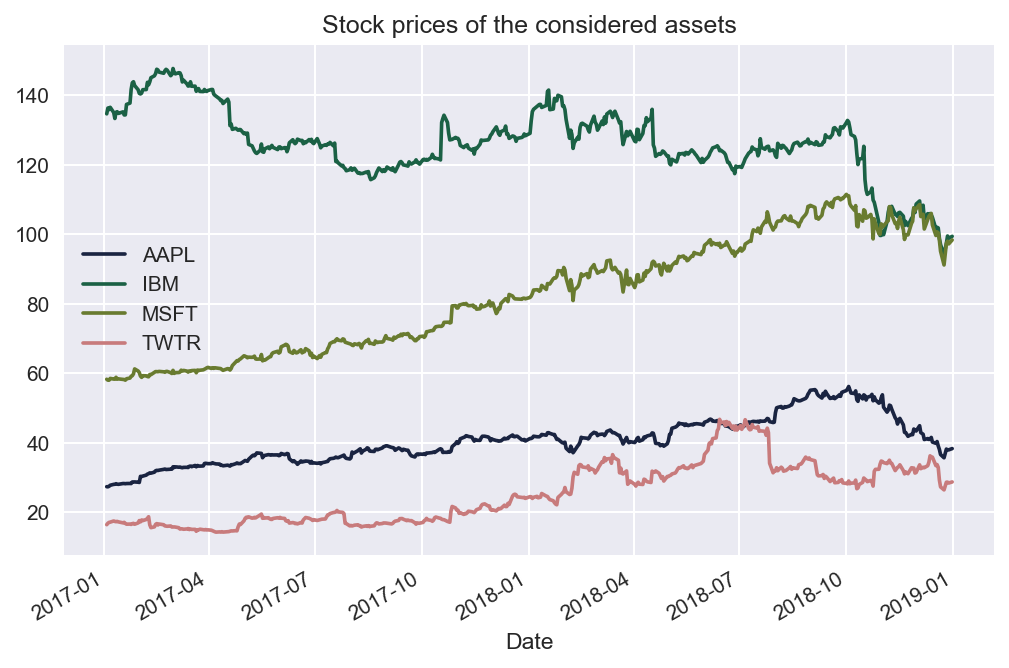

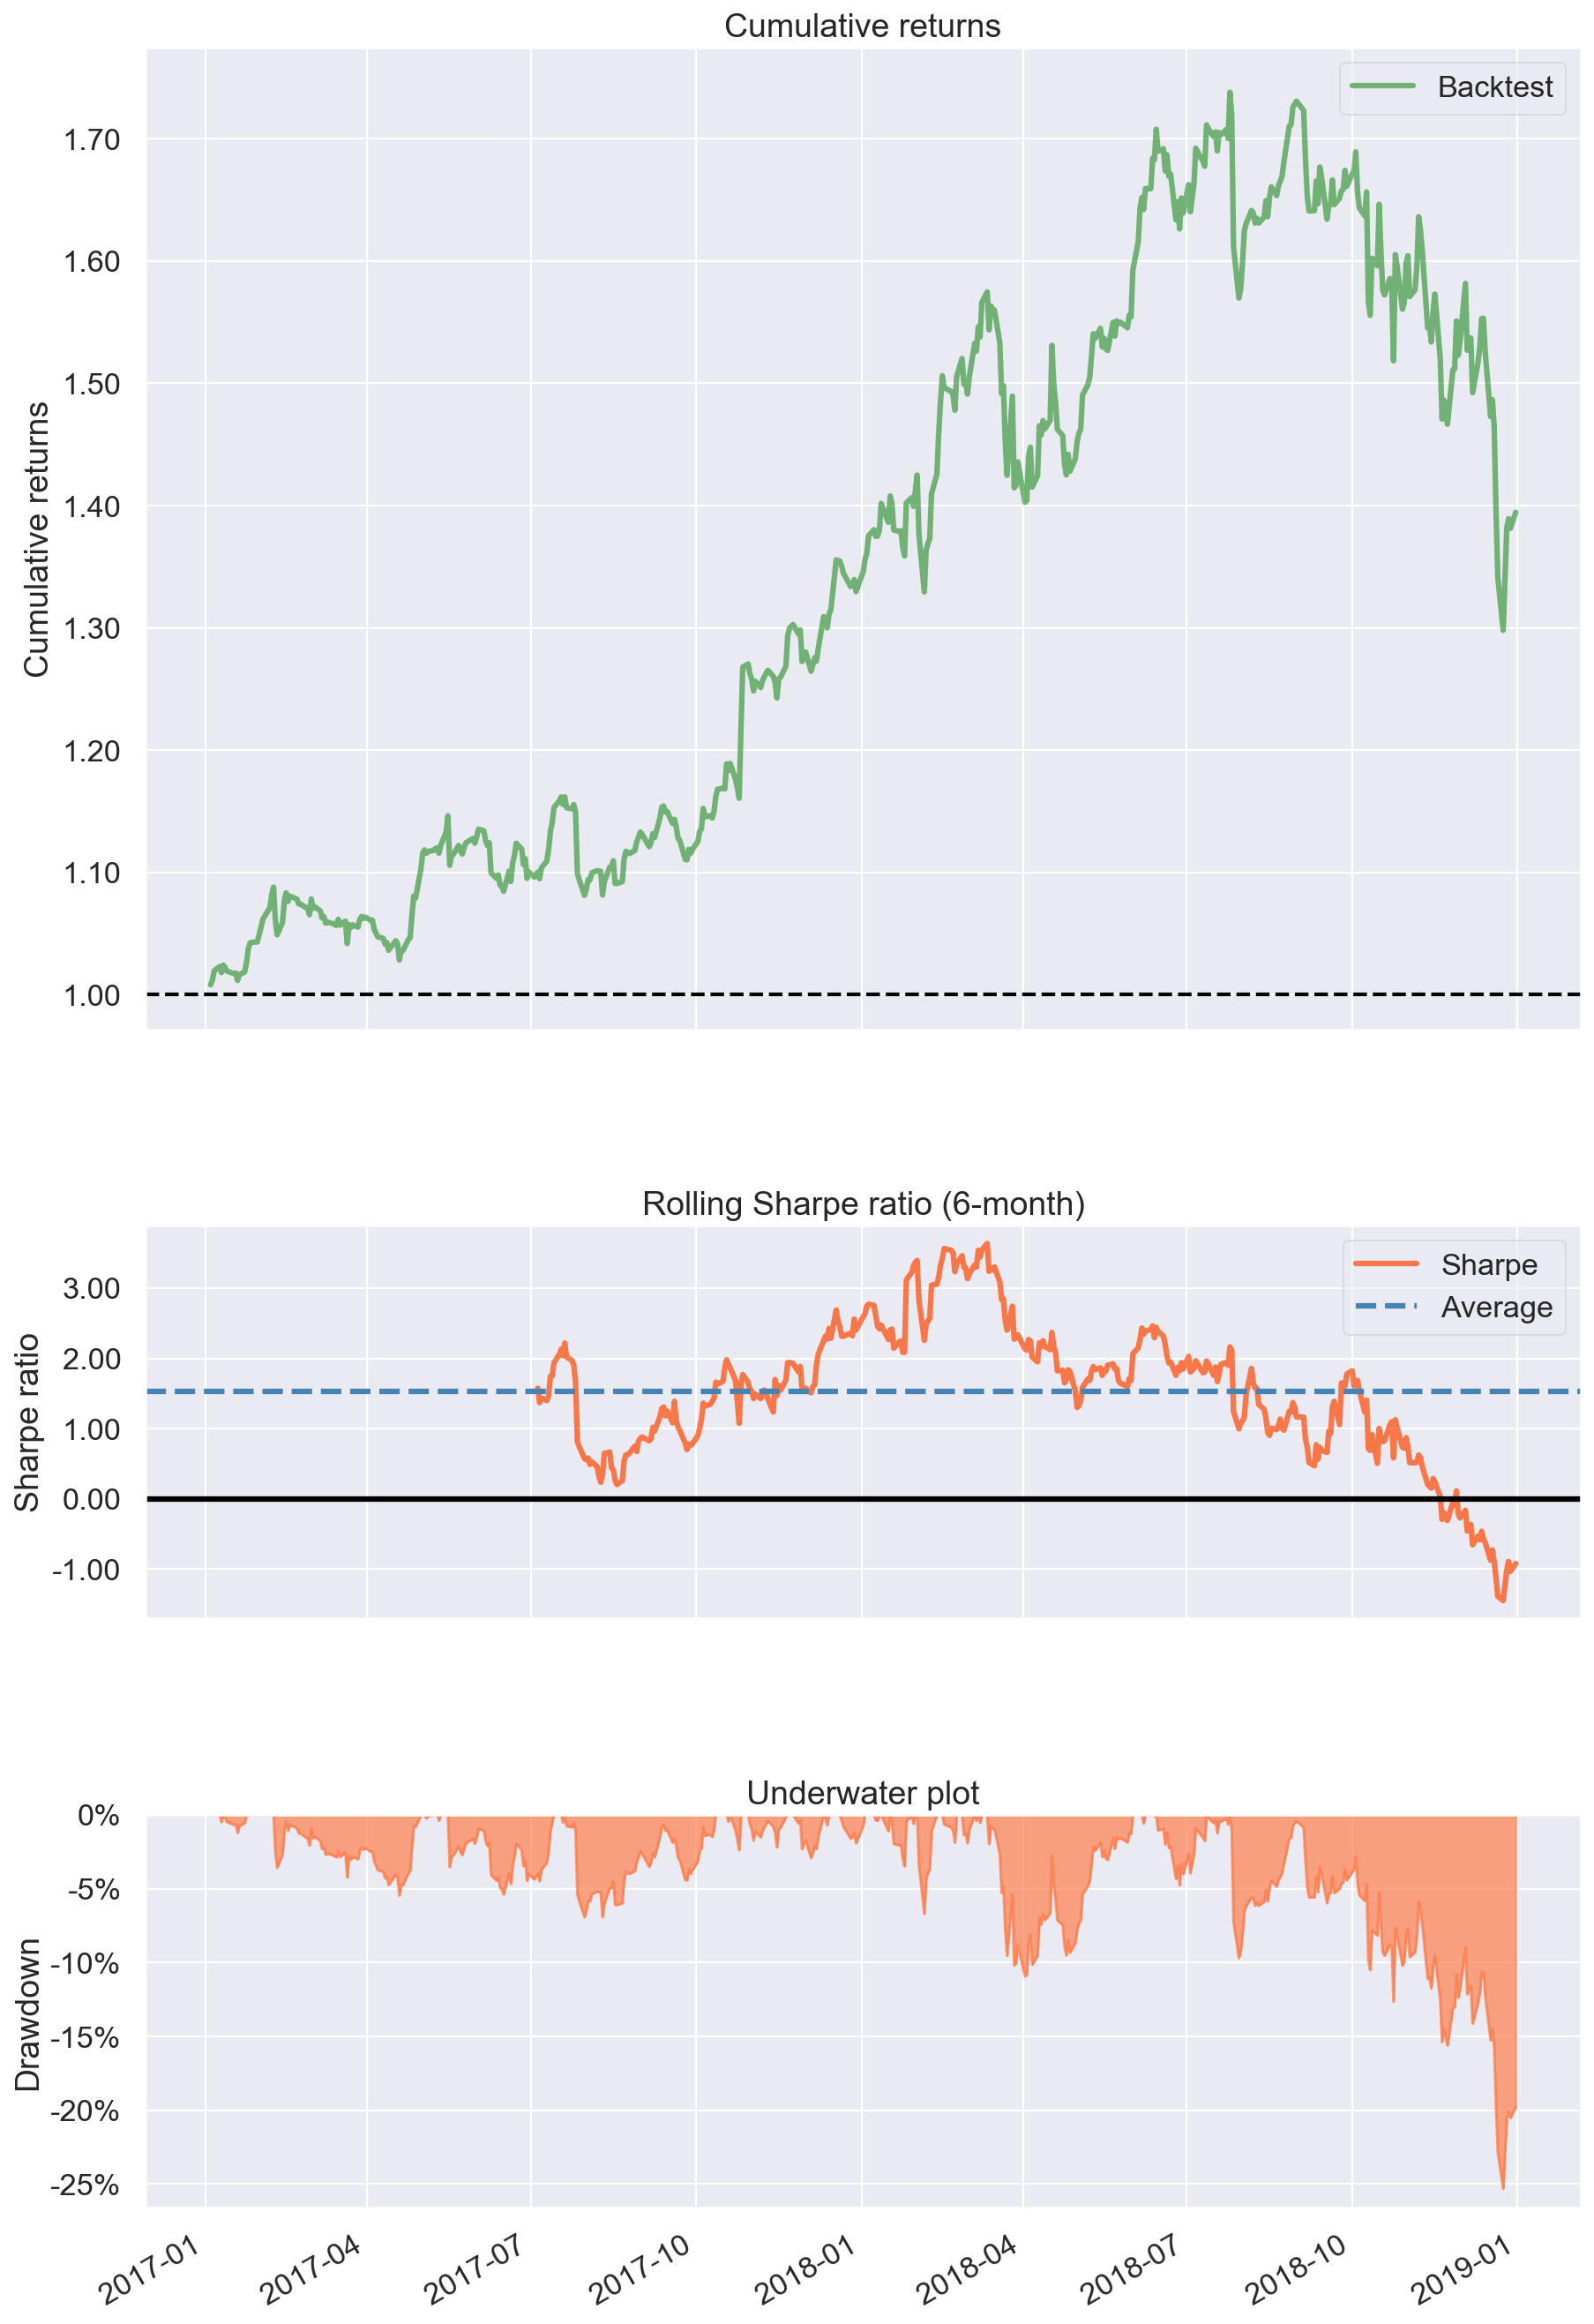

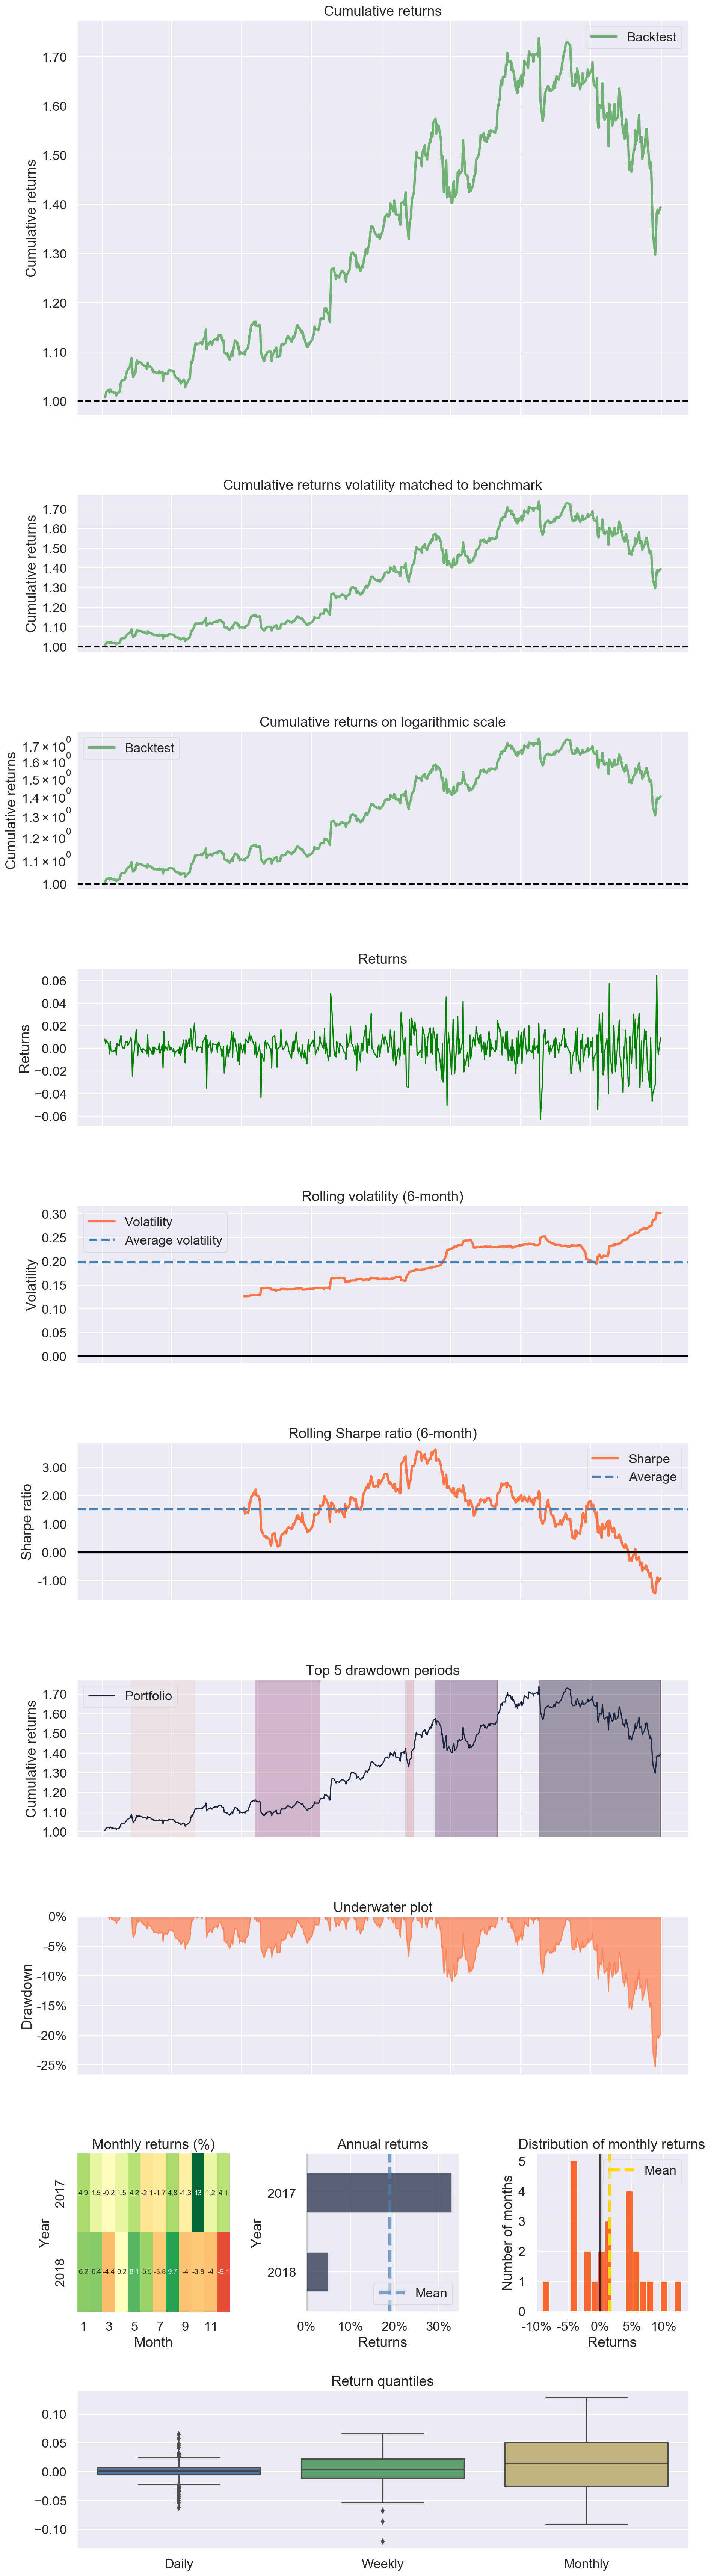

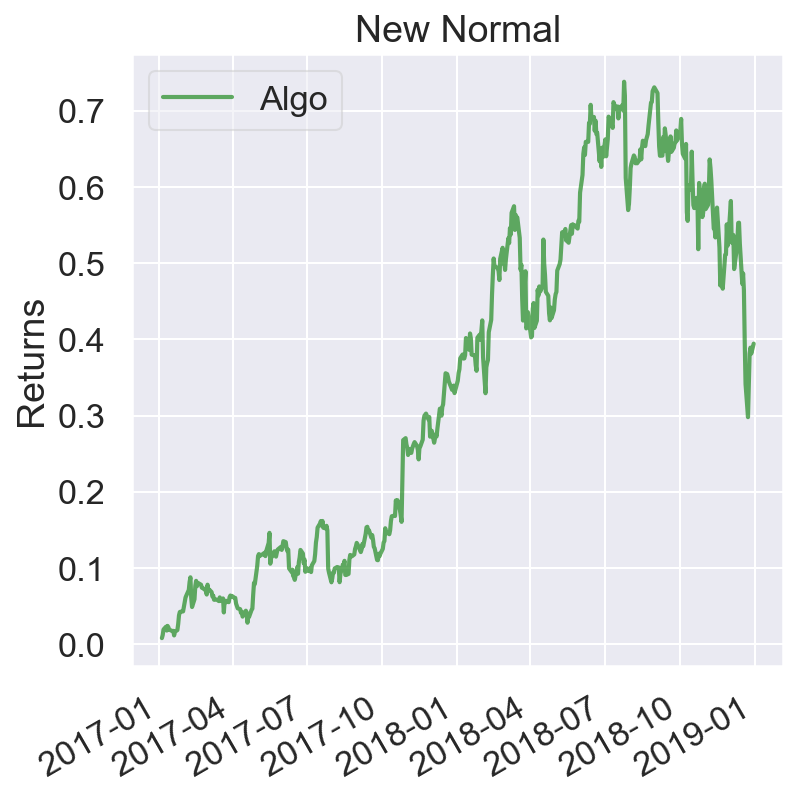

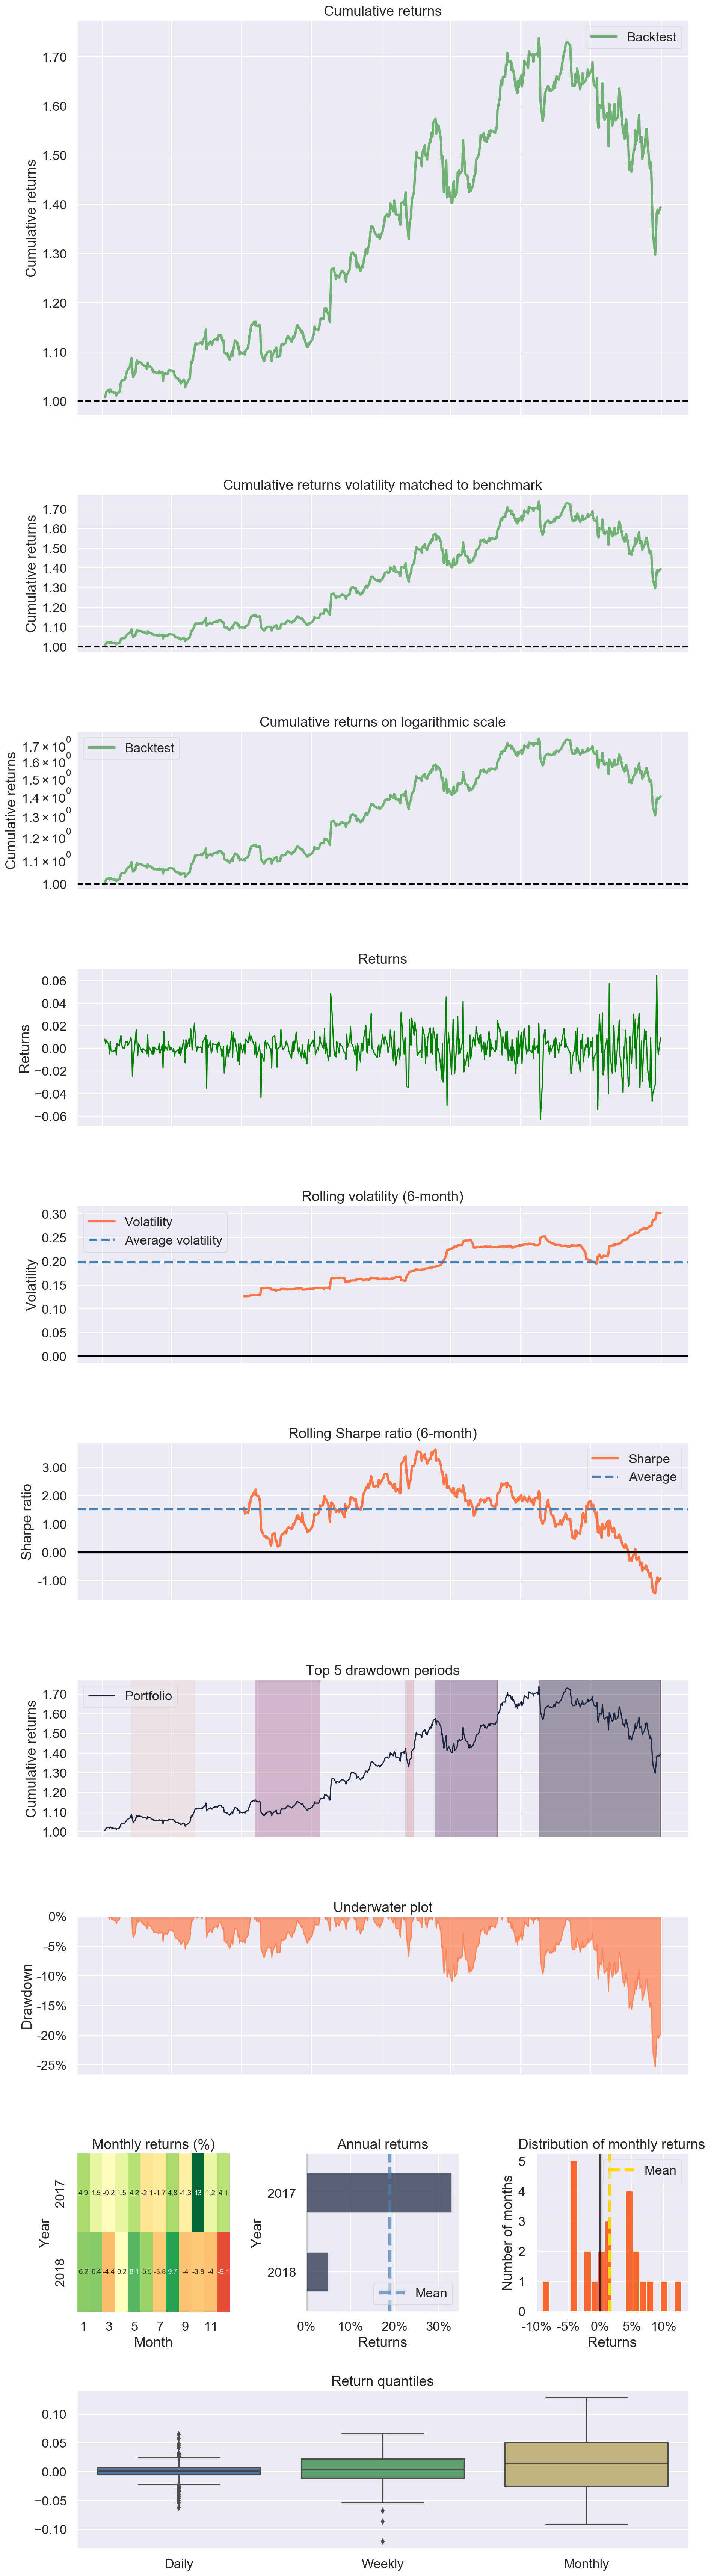

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pyfolio as pf

from datetime import datetime

plt.style.use("seaborn")
sns.set_palette("cubehelix")
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.dpi"] = 150
warnings.simplefilter(action="ignore", category=FutureWarning)

risky_assets = ["AAPL", "IBM", "MSFT", "TWTR"]
n_assets = len(risky_assets)
start = datetime(2017, 1, 1)
end = datetime(2020, 12, 31)
src_data = "data/yf_assets_c07_1.pkl"
try:
    data = pd.read_pickle(src_data)
    print("data reading from file...")
except FileNotFoundError:
    data = yf.download(risky_assets, start=start, end=end, adjusted=True, progress=False)
    data.to_pickle(src_data)
prices_df = data["2017":"2018"]

prices_df["Adj Close"].plot(title="Stock prices of the considered assets")
plt.savefig("ch7_im1.png")

returns = prices_df["Adj Close"].pct_change().dropna()
portfolio_weights = n_assets * [1 / n_assets]
portfolio_returns = pd.Series(np.dot(portfolio_weights, returns.T), index=returns.index)

pf.create_simple_tear_sheet(portfolio_returns)
pf.create_full_tear_sheet(portfolio_returns)
fig = pf.create_returns_tear_sheet(portfolio_returns, return_fig=True)
fig.savefig("ch7_im2.png", dpi=300)